# Data Preprocessing

In [34]:
#import the library


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
#load the dataset into dataframe
df=pd.read_csv("/content/Student_Performance.csv")

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [18]:
#Encoding
df["Extracurricular Activities"]=df["Extracurricular Activities"].astype('category')
df["Extracurricular Activities"]=df["Extracurricular Activities"].cat.codes


In [20]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [21]:
#checking for null values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [22]:
#Check the first few rows of the dataset
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [23]:
#Check the shape of the dataset (number of rows and columns)
df.shape

(10000, 6)

In [24]:
#Summary Statistics
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


# Data Training

In [25]:
#Split data into dependent and independent variable

x=df.drop(columns="Performance Index")
y=df["Performance Index"]

In [26]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [27]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [29]:
#Spliting the dataset into train and test data

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [31]:
#Training the dataset
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Predicting test results

In [32]:
## Predict result
y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)

In [35]:
y_pred_train=regressor.predict(x_train)

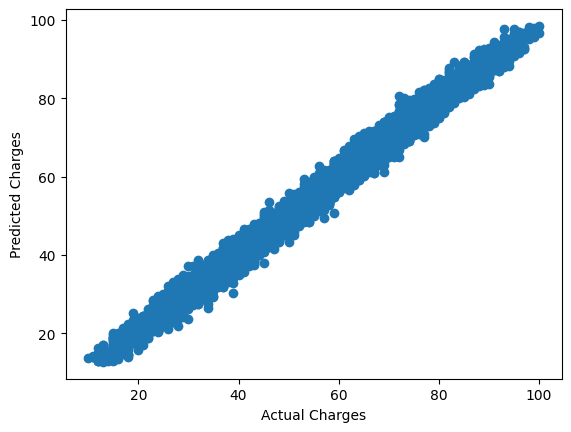

In [39]:
#PLot showing train data results
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [36]:
#r2 score of train data
r2_score(y_train,y_pred_train)

0.9889033042773491

In [37]:
#prediction of test data
y_pred_test=regressor.predict(x_test)

In [38]:
#r2 score of test data
r2_score(y_test,y_pred_test)

0.9880686410711422

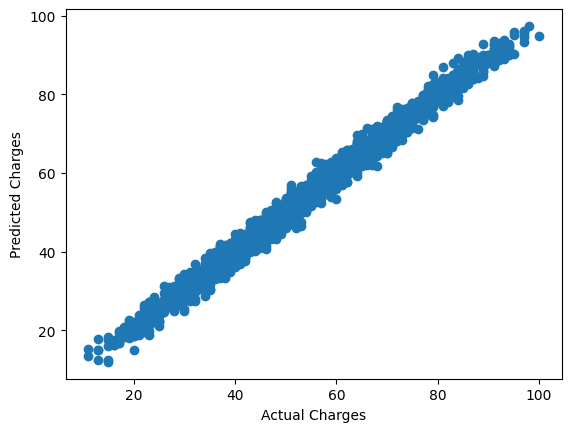

In [41]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [42]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [2.85 1.02 0.67 0.48 0.19]
Intercept: -34.07520822521347


In [44]:
#try with data
test_df = df.loc[1]
my_performance = [[4,82,4,2,7]]
print("Predicted performance:")
print(regressor.predict(my_performance))

print("\n\nActual performance:")
print(df.loc[1]['Performance Index'])

Predicted performance:
[65.81]


Actual performance:
65.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
